In [73]:
from sklearn.metrics import accuracy_score
import pandas as pd
from copy import deepcopy
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [74]:
representations = pd.read_csv("Buchwald_Hartwig_l1_loss_sm_bs_f0_test_representations_last_layer_refactored_DMPNN_true.csv")
representations.head()

,rsmiles,psmiles,entry_no_0,entry_no_1,entry_no_2,entry_no_3,entry_no_4,entry_no_5,entry_no_6,entry_no_7,...,entry_no_990,entry_no_991,entry_no_992,entry_no_993,entry_no_994,entry_no_995,entry_no_996,entry_no_997,entry_no_998,entry_no_999
0,[CH3:12][c:13]1[cH:14][cH:15][c:16]([NH2:17])[...,[F:1][C:2]([F:3])([F:4])[c:5]1[cH:6][cH:7][c:8...,-0.074338,-0.072237,0.539024,-0.018338,-0.147638,-0.054884,-0.081585,-0.149401,...,-0.144095,-0.127766,0.762317,0.073715,-0.035006,-0.022956,-0.128499,-0.204610,-0.012686,-0.115420
1,[CH3:12][c:13]1[cH:14][cH:15][c:16]([NH2:17])[...,[F:1][C:2]([F:3])([F:4])[c:5]1[cH:6][cH:7][c:8...,-0.056284,-0.059406,0.327755,-0.016316,-0.065486,-0.047367,-0.046263,-0.105547,...,-0.096214,-0.060500,1.161085,-0.099158,-0.047263,-0.022311,-0.114577,-0.073836,-0.055562,-0.007127
2,[CH3:10][c:11]1[cH:12][cH:13][c:14]([NH2:15])[...,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]([NH:15][c:...,-0.030620,-0.039167,0.449492,-0.016755,-0.103183,-0.100779,-0.074311,-0.061516,...,-0.116010,-0.049445,1.172023,-0.073115,-0.043907,-0.020840,-0.109180,-0.131191,-0.038311,-0.133302
3,[CH3:10][c:11]1[cH:12][cH:13][c:14]([NH2:15])[...,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]([NH:15][c:...,-0.097866,1.647634,-0.103648,-0.005119,-0.110689,-0.163668,-0.045147,-0.121662,...,-0.064492,-0.061302,0.522449,-0.094823,-0.098452,-0.067184,-0.058292,-0.216720,-0.072254,-0.117365
4,[CH3:10][c:11]1[cH:12][cH:13][c:14]([NH2:15])[...,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]([NH:15][c:...,-0.015725,0.360169,-0.007834,-0.016748,-0.129715,-0.092573,-0.091092,-0.045655,...,-0.106217,-0.063157,0.484209,-0.049328,-0.049124,-0.037897,-0.027246,-0.114540,-0.074737,-0.146074


In [75]:
data_train_preds = pd.read_csv("Buchwald_Hartwig_l1_loss_sm_bs_f0_test_preds_true.csv")


In [76]:
representations2 = representations.dropna()
representations2.shape

(1186, 1002)

In [77]:
data_train_preds = pd.read_csv("Buchwald_Hartwig_l1_loss_sm_bs_f0_test_preds_true.csv")
data_train_preds.head()

,rsmiles,psmiles,YIELD,predicted,label,reaction class,num not zero atoms
0,[CH3:12][c:13]1[cH:14][cH:15][c:16]([NH2:17])[...,[F:1][C:2]([F:3])([F:4])[c:5]1[cH:6][cH:7][c:8...,0.367210,0,0.121630,0,4
1,[CH3:12][c:13]1[cH:14][cH:15][c:16]([NH2:17])[...,[F:1][C:2]([F:3])([F:4])[c:5]1[cH:6][cH:7][c:8...,0.321601,0,0.082865,0,6
2,[CH3:10][c:11]1[cH:12][cH:13][c:14]([NH2:15])[...,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]([NH:15][c:...,0.327115,0,0.010681,0,4
3,[CH3:10][c:11]1[cH:12][cH:13][c:14]([NH2:15])[...,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]([NH:15][c:...,0.324785,0,0.443725,0,4
4,[CH3:10][c:11]1[cH:12][cH:13][c:14]([NH2:15])[...,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]([NH:15][c:...,0.334168,0,0.533844,0,4


In [78]:
representations_copy = deepcopy(representations)

entries_names = representations_copy.iloc[:,2:].columns

for column in entries_names:
    representations_copy[column] = (representations_copy[column] - np.mean(representations_copy[column] ))/np.std(representations_copy[column] )

representations_copy.head()

,rsmiles,psmiles,entry_no_0,entry_no_1,entry_no_2,entry_no_3,entry_no_4,entry_no_5,entry_no_6,entry_no_7,...,entry_no_990,entry_no_991,entry_no_992,entry_no_993,entry_no_994,entry_no_995,entry_no_996,entry_no_997,entry_no_998,entry_no_999
0,[CH3:12][c:13]1[cH:14][cH:15][c:16]([NH2:17])[...,[F:1][C:2]([F:3])([F:4])[c:5]1[cH:6][cH:7][c:8...,-0.462610,-0.692762,0.665599,0.142672,-1.358467,0.850506,-0.873550,-0.675460,...,-0.460604,-0.649502,0.507384,0.130358,0.328481,0.622383,-0.467693,-1.026196,0.897363,-0.170958
1,[CH3:12][c:13]1[cH:14][cH:15][c:16]([NH2:17])[...,[F:1][C:2]([F:3])([F:4])[c:5]1[cH:6][cH:7][c:8...,-0.226036,-0.667555,0.126518,0.207834,0.259180,1.097707,0.244357,-0.267654,...,-0.186793,-0.131393,1.404548,-0.456688,0.081042,0.641054,-0.263777,0.673990,-0.214877,0.570915
2,[CH3:10][c:11]1[cH:12][cH:13][c:14]([NH2:15])[...,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]([NH:15][c:...,0.110247,-0.627795,0.437146,0.193681,-0.483118,-0.658659,-0.643328,0.141802,...,-0.299997,-0.046242,1.429155,-0.368251,0.148783,0.683617,-0.184736,-0.071685,0.232638,-0.293459
3,[CH3:10][c:11]1[cH:12][cH:13][c:14]([NH2:15])[...,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]([NH:15][c:...,-0.770898,2.685961,-0.974267,0.568739,-0.630922,-2.726630,0.279683,-0.417505,...,-0.005387,-0.137574,-0.032281,-0.441966,-0.952352,-0.657422,0.560585,-1.183636,-0.647855,-0.184281
4,[CH3:10][c:11]1[cH:12][cH:13][c:14]([NH2:15])[...,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]([NH:15][c:...,0.305426,0.156708,-0.729785,0.193907,-1.005555,-0.388817,-1.174445,0.289293,...,-0.243995,-0.151863,-0.118314,-0.287472,0.043466,0.190046,1.015307,0.144798,-0.712287,-0.380958


No handles with labels found to put in legend.


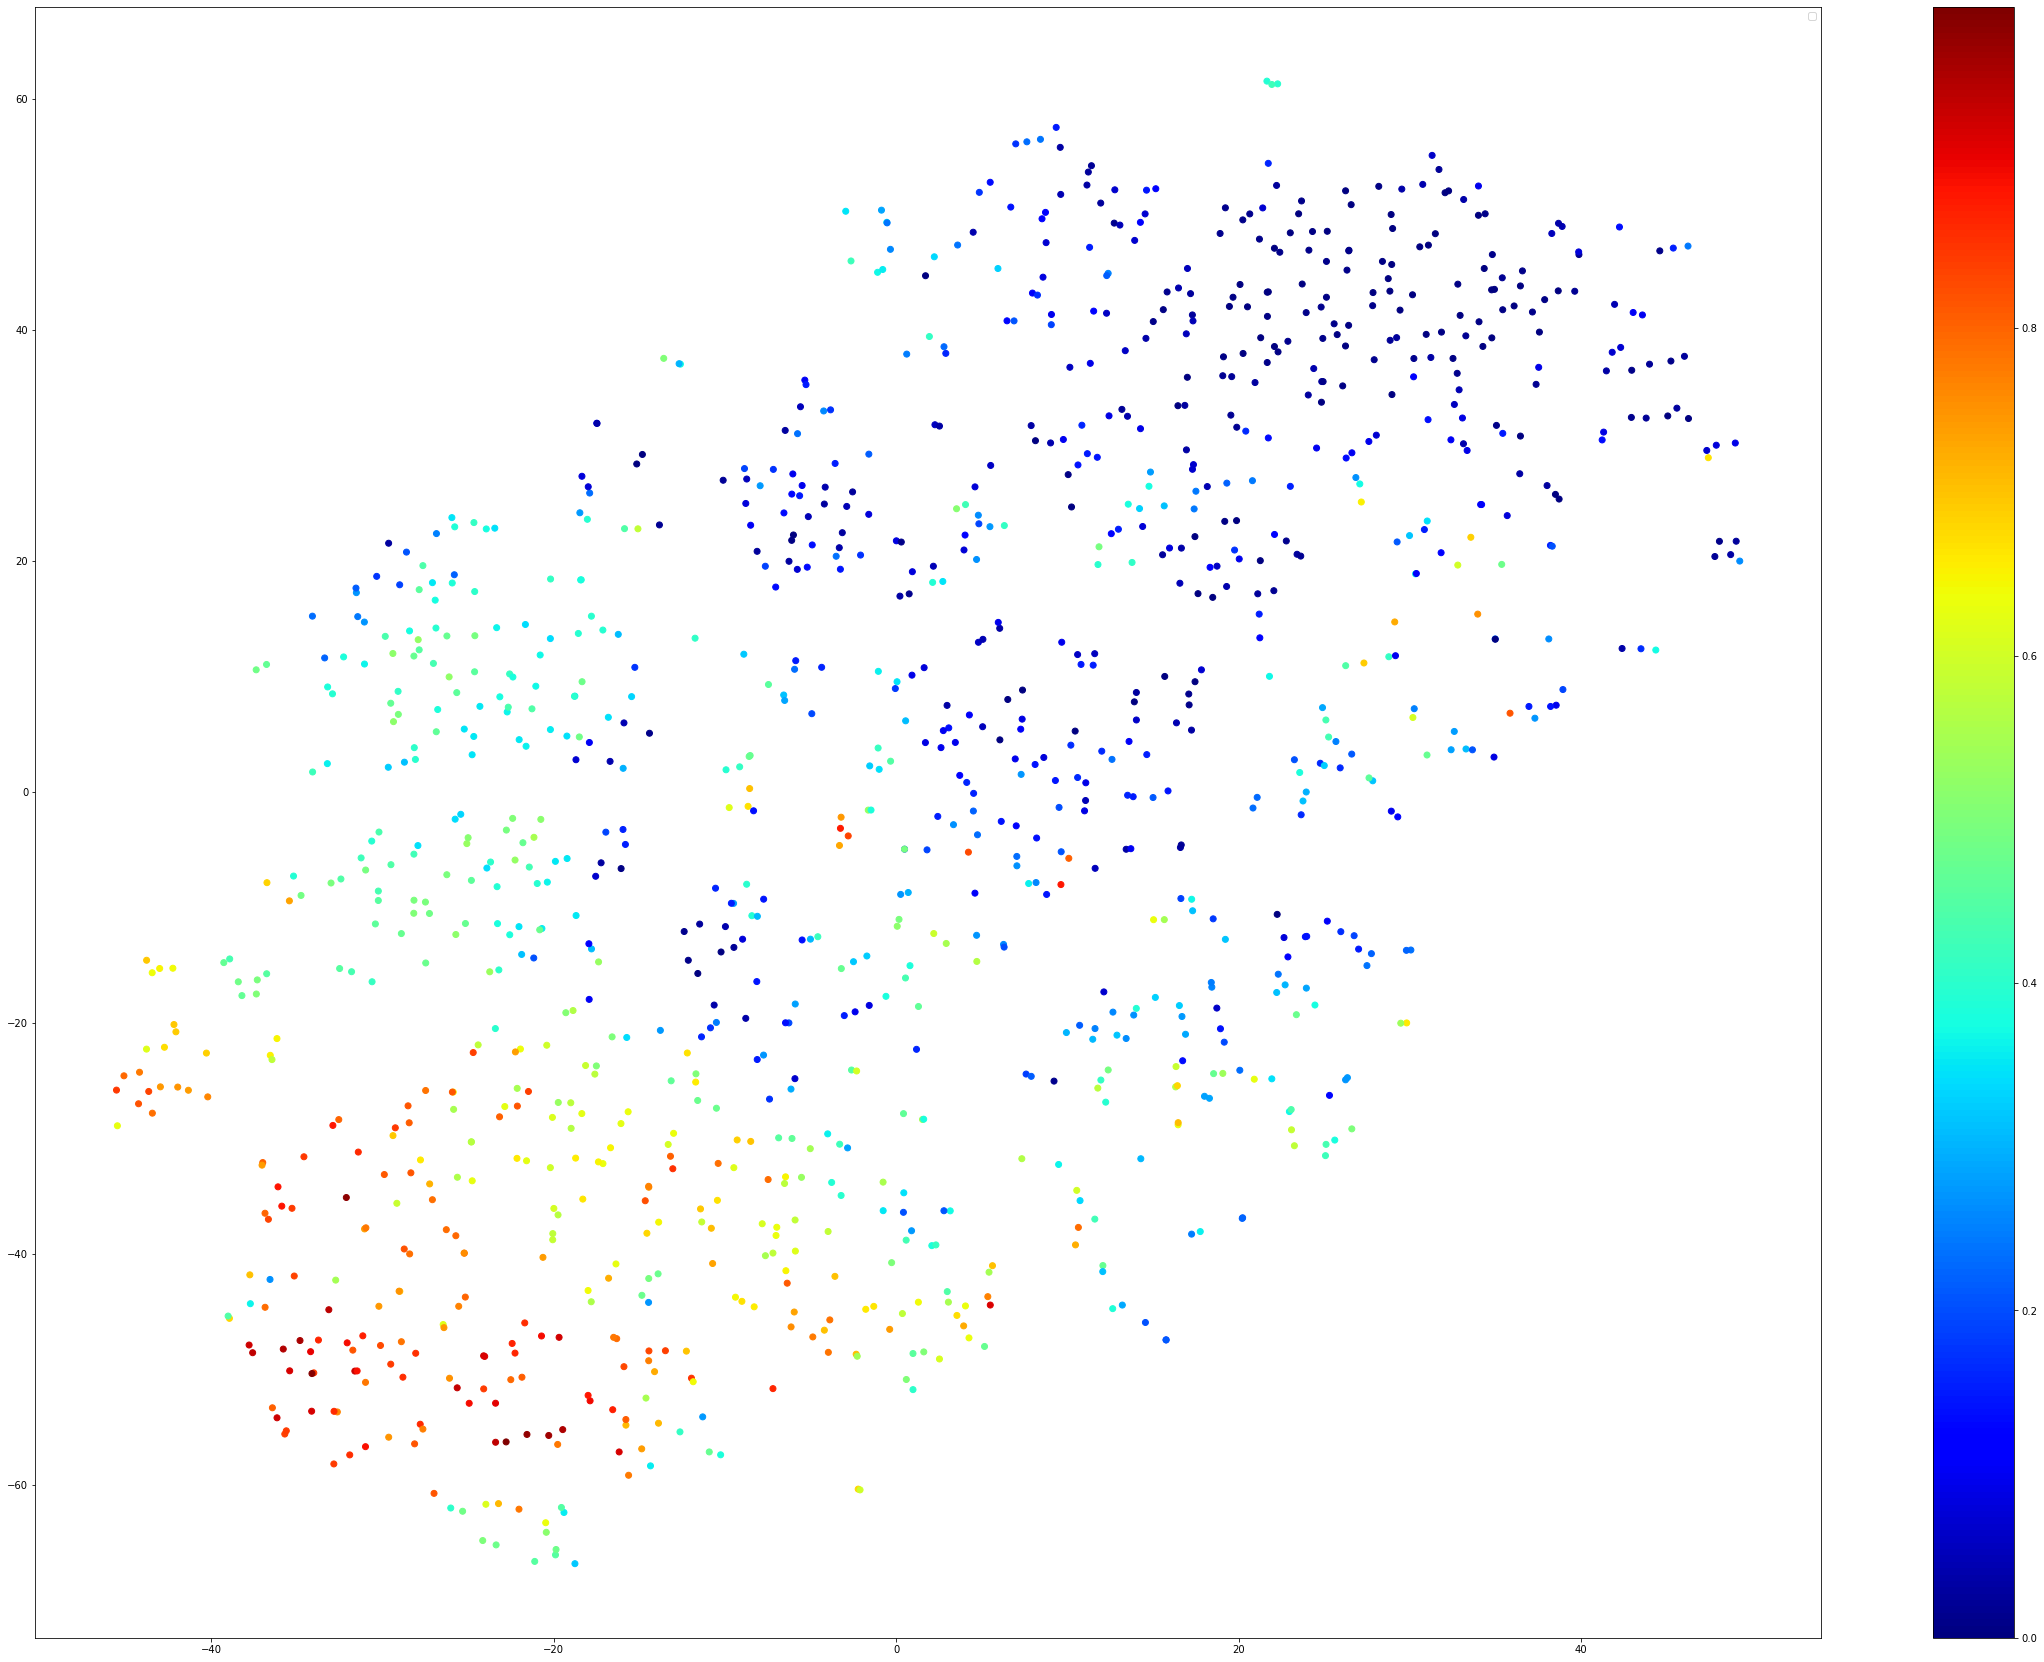

In [84]:
X2D = representations_copy[entries_names].to_numpy()
X_embedded2D = TSNE(n_components=2, perplexity=30).fit_transform(X2D)
figure = plt.figure(figsize=(40,30))
plt.scatter(X_embedded2D.T[0], X_embedded2D.T[1], c=data_train_preds['label'], cmap = 'jet')
plt.legend()
plt.colorbar()
plt.show()

No handles with labels found to put in legend.


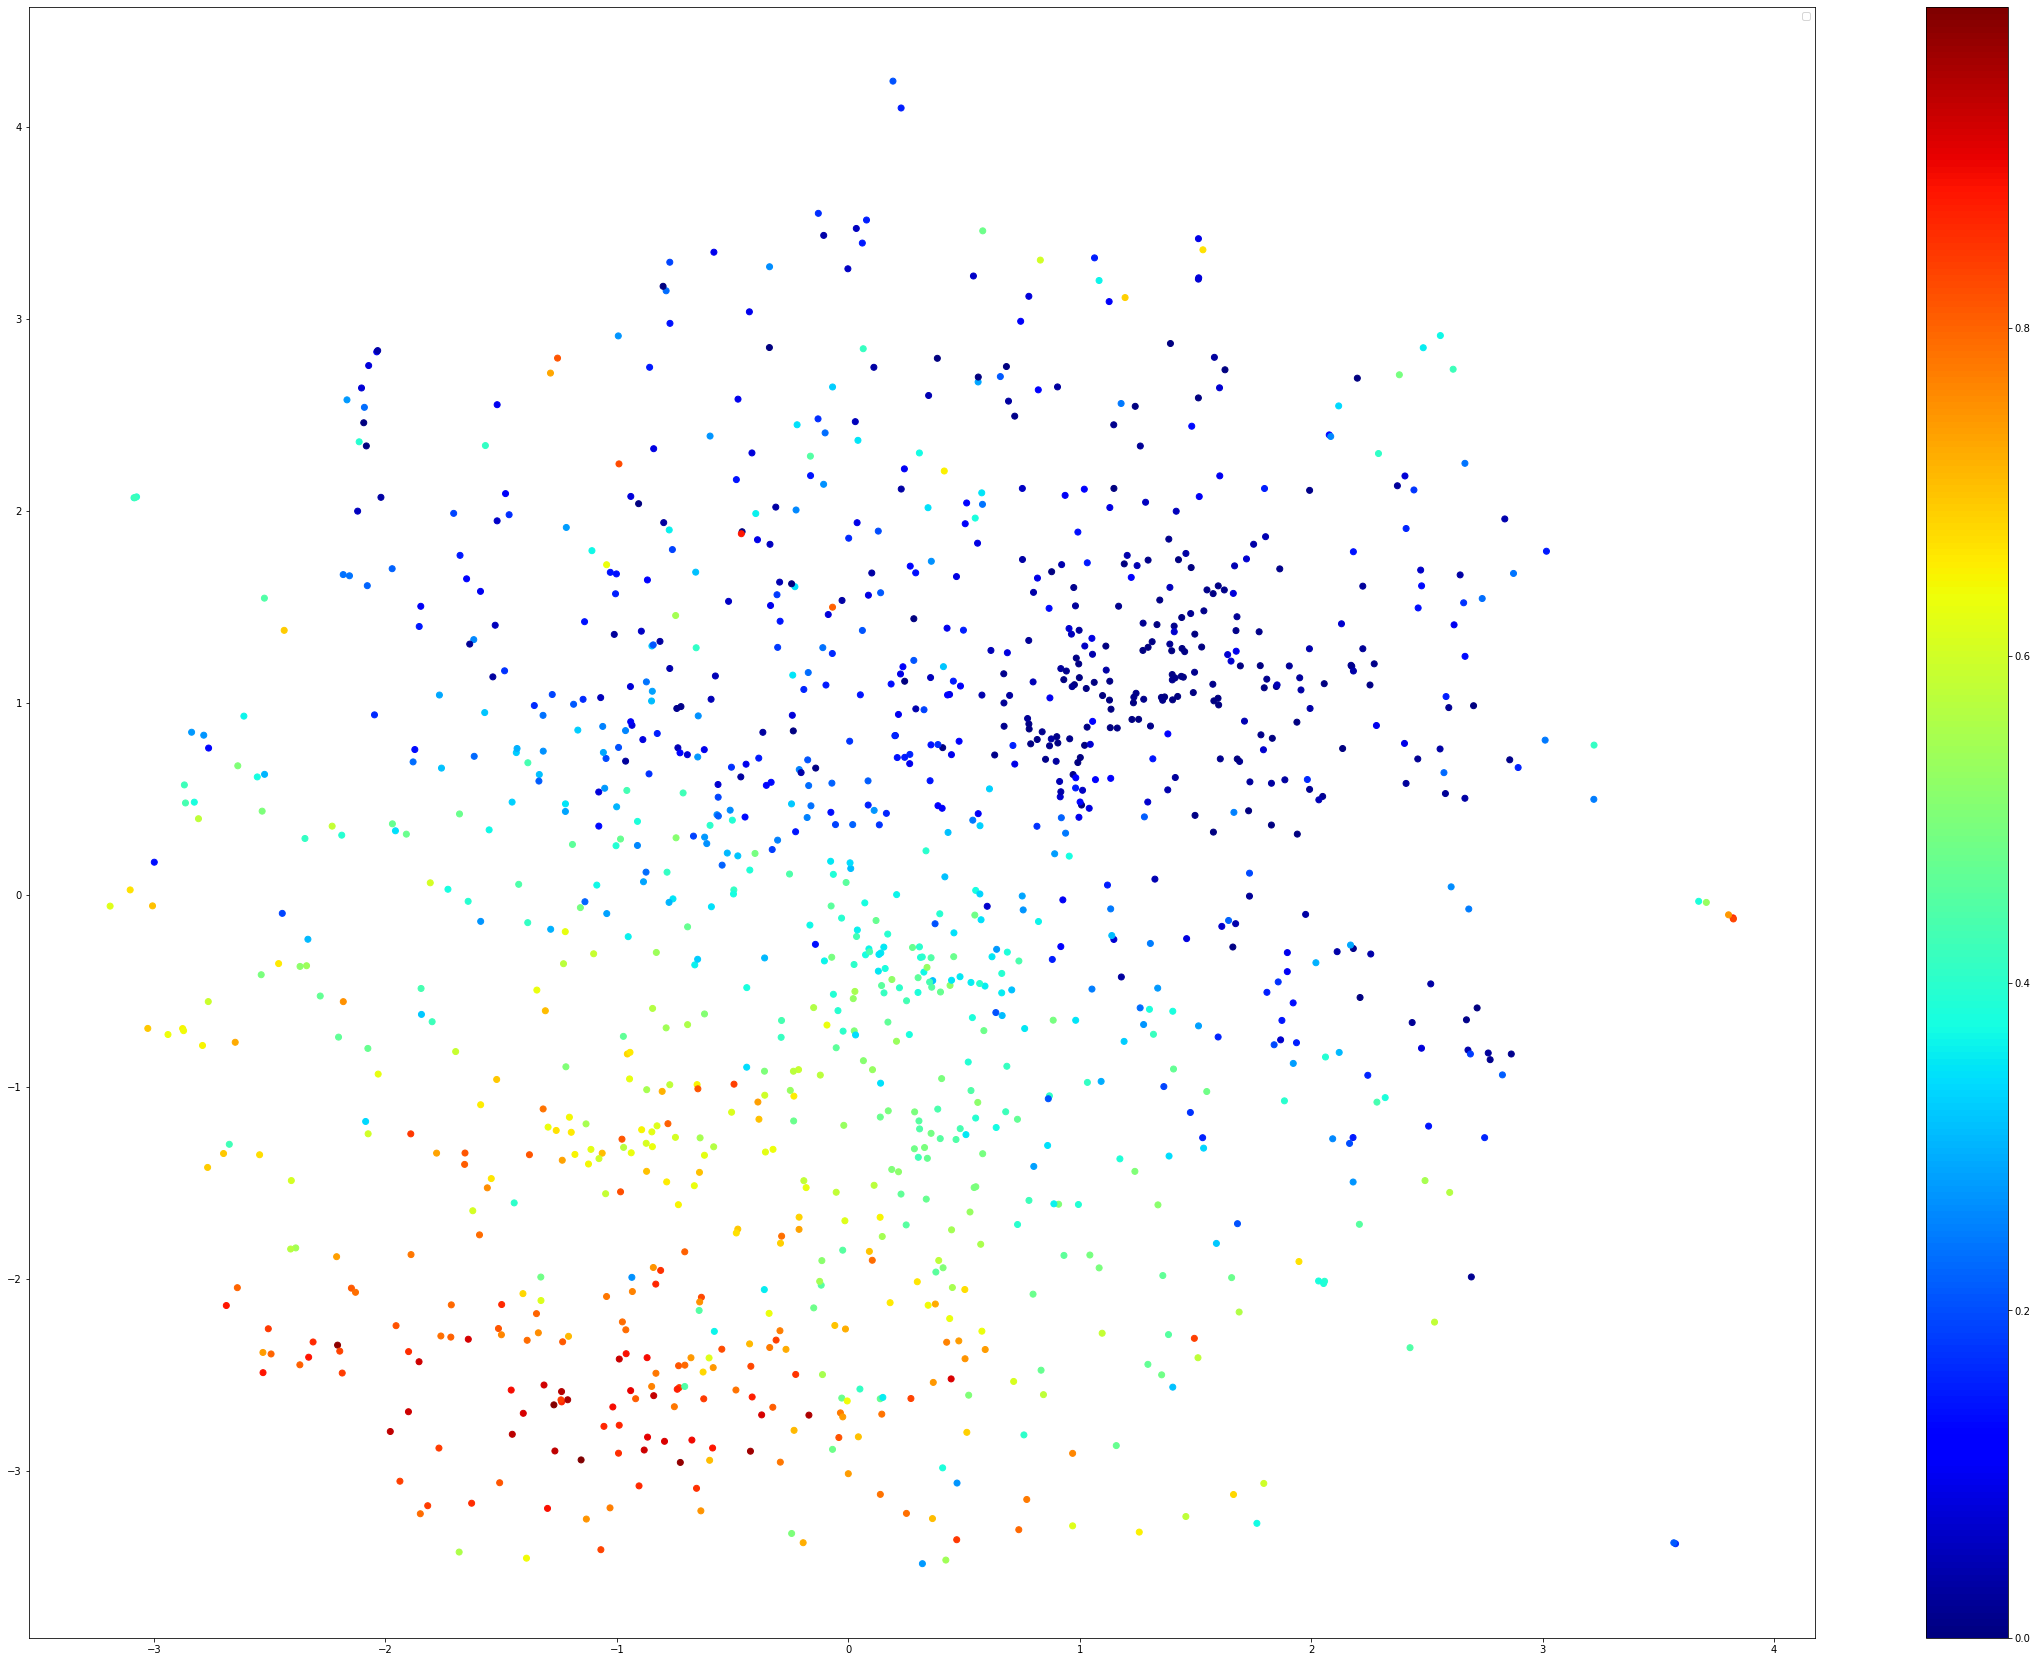

In [79]:
X2D = representations_copy[entries_names].to_numpy()
X_embedded2D = TSNE(n_components=2, perplexity=500).fit_transform(X2D)
figure = plt.figure(figsize=(40,30))
plt.scatter(X_embedded2D.T[0], X_embedded2D.T[1], c=data_train_preds['label'], cmap = 'jet')
plt.legend()
plt.colorbar()
plt.show()

No handles with labels found to put in legend.


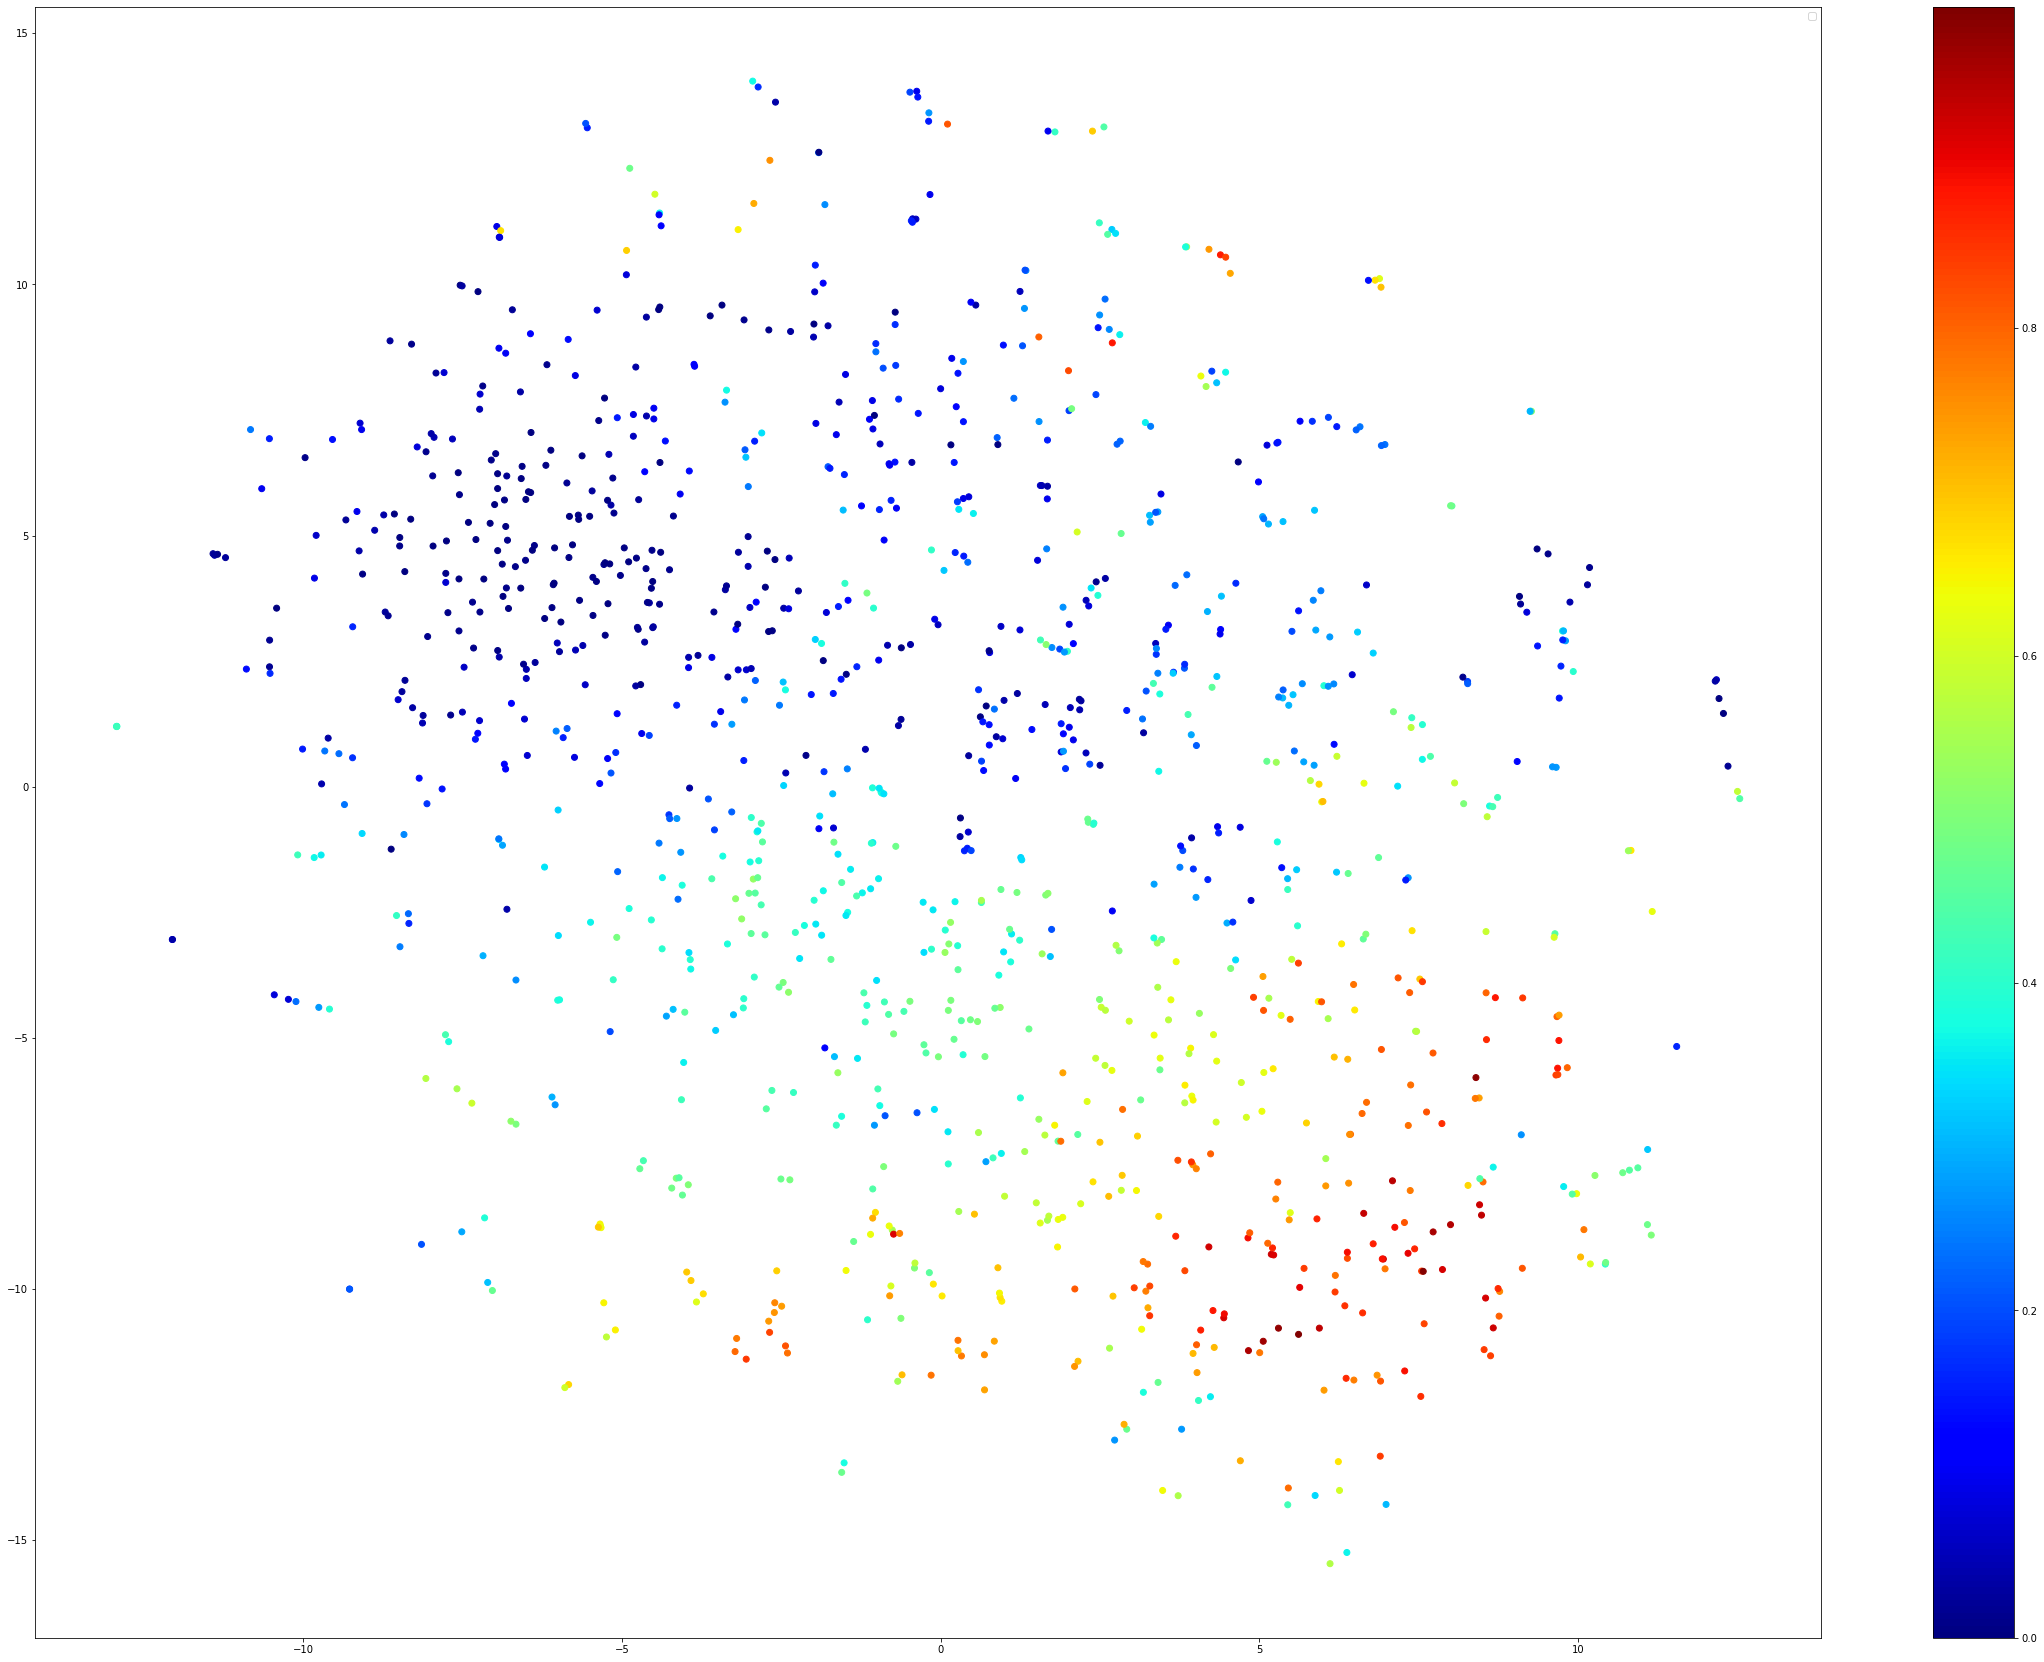

In [80]:
X2D = representations_copy[entries_names].to_numpy()
X_embedded2D = TSNE(n_components=2, perplexity=200).fit_transform(X2D)
figure = plt.figure(figsize=(40,30))
plt.scatter(X_embedded2D.T[0], X_embedded2D.T[1], c=data_train_preds['label'], cmap = 'jet')
plt.legend()
plt.colorbar()
plt.show()

In [81]:
X3D = representations_copy[entries_names].to_numpy()
X_embedded3D = TSNE(n_components=3, perplexity=1000).fit_transform(X3D)
X_embedded3D.shape

(1186, 3)

In [85]:
def present_in_2D(data_train_preds, X_embedded2D):
    figure = plt.figure(figsize=(40,30))
    plt.scatter(X_embedded2D.T[0], X_embedded2D.T[1], c=data_train_preds['label'], cmap = 'jet')
    plt.legend()
    plt.colorbar()
        
    return plt.show()

def present_in_3D(data_train_preds, X_embedded):
    df = pd.DataFrame(columns= ['x', 'y', 'z', 'predicted'])
    x, y, z, preds = [], [], [], []
    for j in range(len(X_embedded)):
        x.append(X_embedded[j][0])
        y.append(X_embedded[j][1])
        z.append(X_embedded[j][2])

        preds.append(data_train_preds['label'][j])

    df['x'] = x
    df['y'] = y
    df['z'] = z
    df['label'] = preds

    fig = px.scatter_3d(df, x='x', y='y', z='z', color='label')

    return fig, df

fig1, df = present_in_3D(data_train_preds, X_embedded3D)
# fig1.show()

In [86]:
fig1.show()

# Middle layer

In [87]:
representations = pd.read_csv("Buchwald_Hartwig_l1_loss_sm_bs_f0_test_representations_refactored_DMPNN_true.csv")
representations_copy = deepcopy(representations)

entries_names = representations_copy.iloc[:,2:].columns

for column in entries_names:
    representations_copy[column] = (representations_copy[column] - np.mean(representations_copy[column] ))/np.std(representations_copy[column] )

representations_copy.head()

,rsmiles,psmiles,entry_no_0,entry_no_1,entry_no_2,entry_no_3,entry_no_4,entry_no_5,entry_no_6,entry_no_7,...,entry_no_990,entry_no_991,entry_no_992,entry_no_993,entry_no_994,entry_no_995,entry_no_996,entry_no_997,entry_no_998,entry_no_999
0,[CH3:12][c:13]1[cH:14][cH:15][c:16]([NH2:17])[...,[F:1][C:2]([F:3])([F:4])[c:5]1[cH:6][cH:7][c:8...,-0.304978,0.517969,0.779995,-0.278973,-0.936600,-0.763824,0.018725,-0.398733,...,-0.397889,0.493811,-0.456525,-0.331307,-0.171690,-0.681961,-0.170366,-0.408556,-0.165329,-0.261722
1,[CH3:12][c:13]1[cH:14][cH:15][c:16]([NH2:17])[...,[F:1][C:2]([F:3])([F:4])[c:5]1[cH:6][cH:7][c:8...,0.224130,-0.444841,0.836621,-0.218168,-0.415659,-0.702188,1.095757,0.565641,...,0.953853,-0.096601,-0.365961,-0.373525,0.500873,-0.701941,0.091747,1.082089,0.650650,-0.427327
2,[CH3:10][c:11]1[cH:12][cH:13][c:14]([NH2:15])[...,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]([NH:15][c:...,2.643959,-0.633784,0.191123,3.729056,-1.066571,-0.601277,3.072178,2.709747,...,2.439528,-0.313306,1.202787,-0.660967,1.624654,-0.697303,-0.129885,1.417574,0.178523,-0.327500
3,[CH3:10][c:11]1[cH:12][cH:13][c:14]([NH2:15])[...,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]([NH:15][c:...,-0.415791,-0.449986,0.635668,-0.307114,-1.060997,1.047656,-0.415072,-0.559108,...,-0.562576,0.838905,1.228340,-0.488382,1.483597,-0.739418,-0.343256,-0.626487,-0.611869,2.786856
4,[CH3:10][c:11]1[cH:12][cH:13][c:14]([NH2:15])[...,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]([NH:15][c:...,-0.415791,-0.449986,0.635668,-0.307114,-1.060997,1.047656,-0.415072,-0.559108,...,-0.562576,0.838905,1.228340,-0.488382,1.483597,-0.739418,-0.343256,-0.626487,-0.611869,2.786856


In [88]:
X2D = representations_copy[entries_names].to_numpy()
X_embedded2D = TSNE(n_components=2, perplexity=500).fit_transform(X2D)
X_embedded2D.shape

(1186, 2)

No handles with labels found to put in legend.


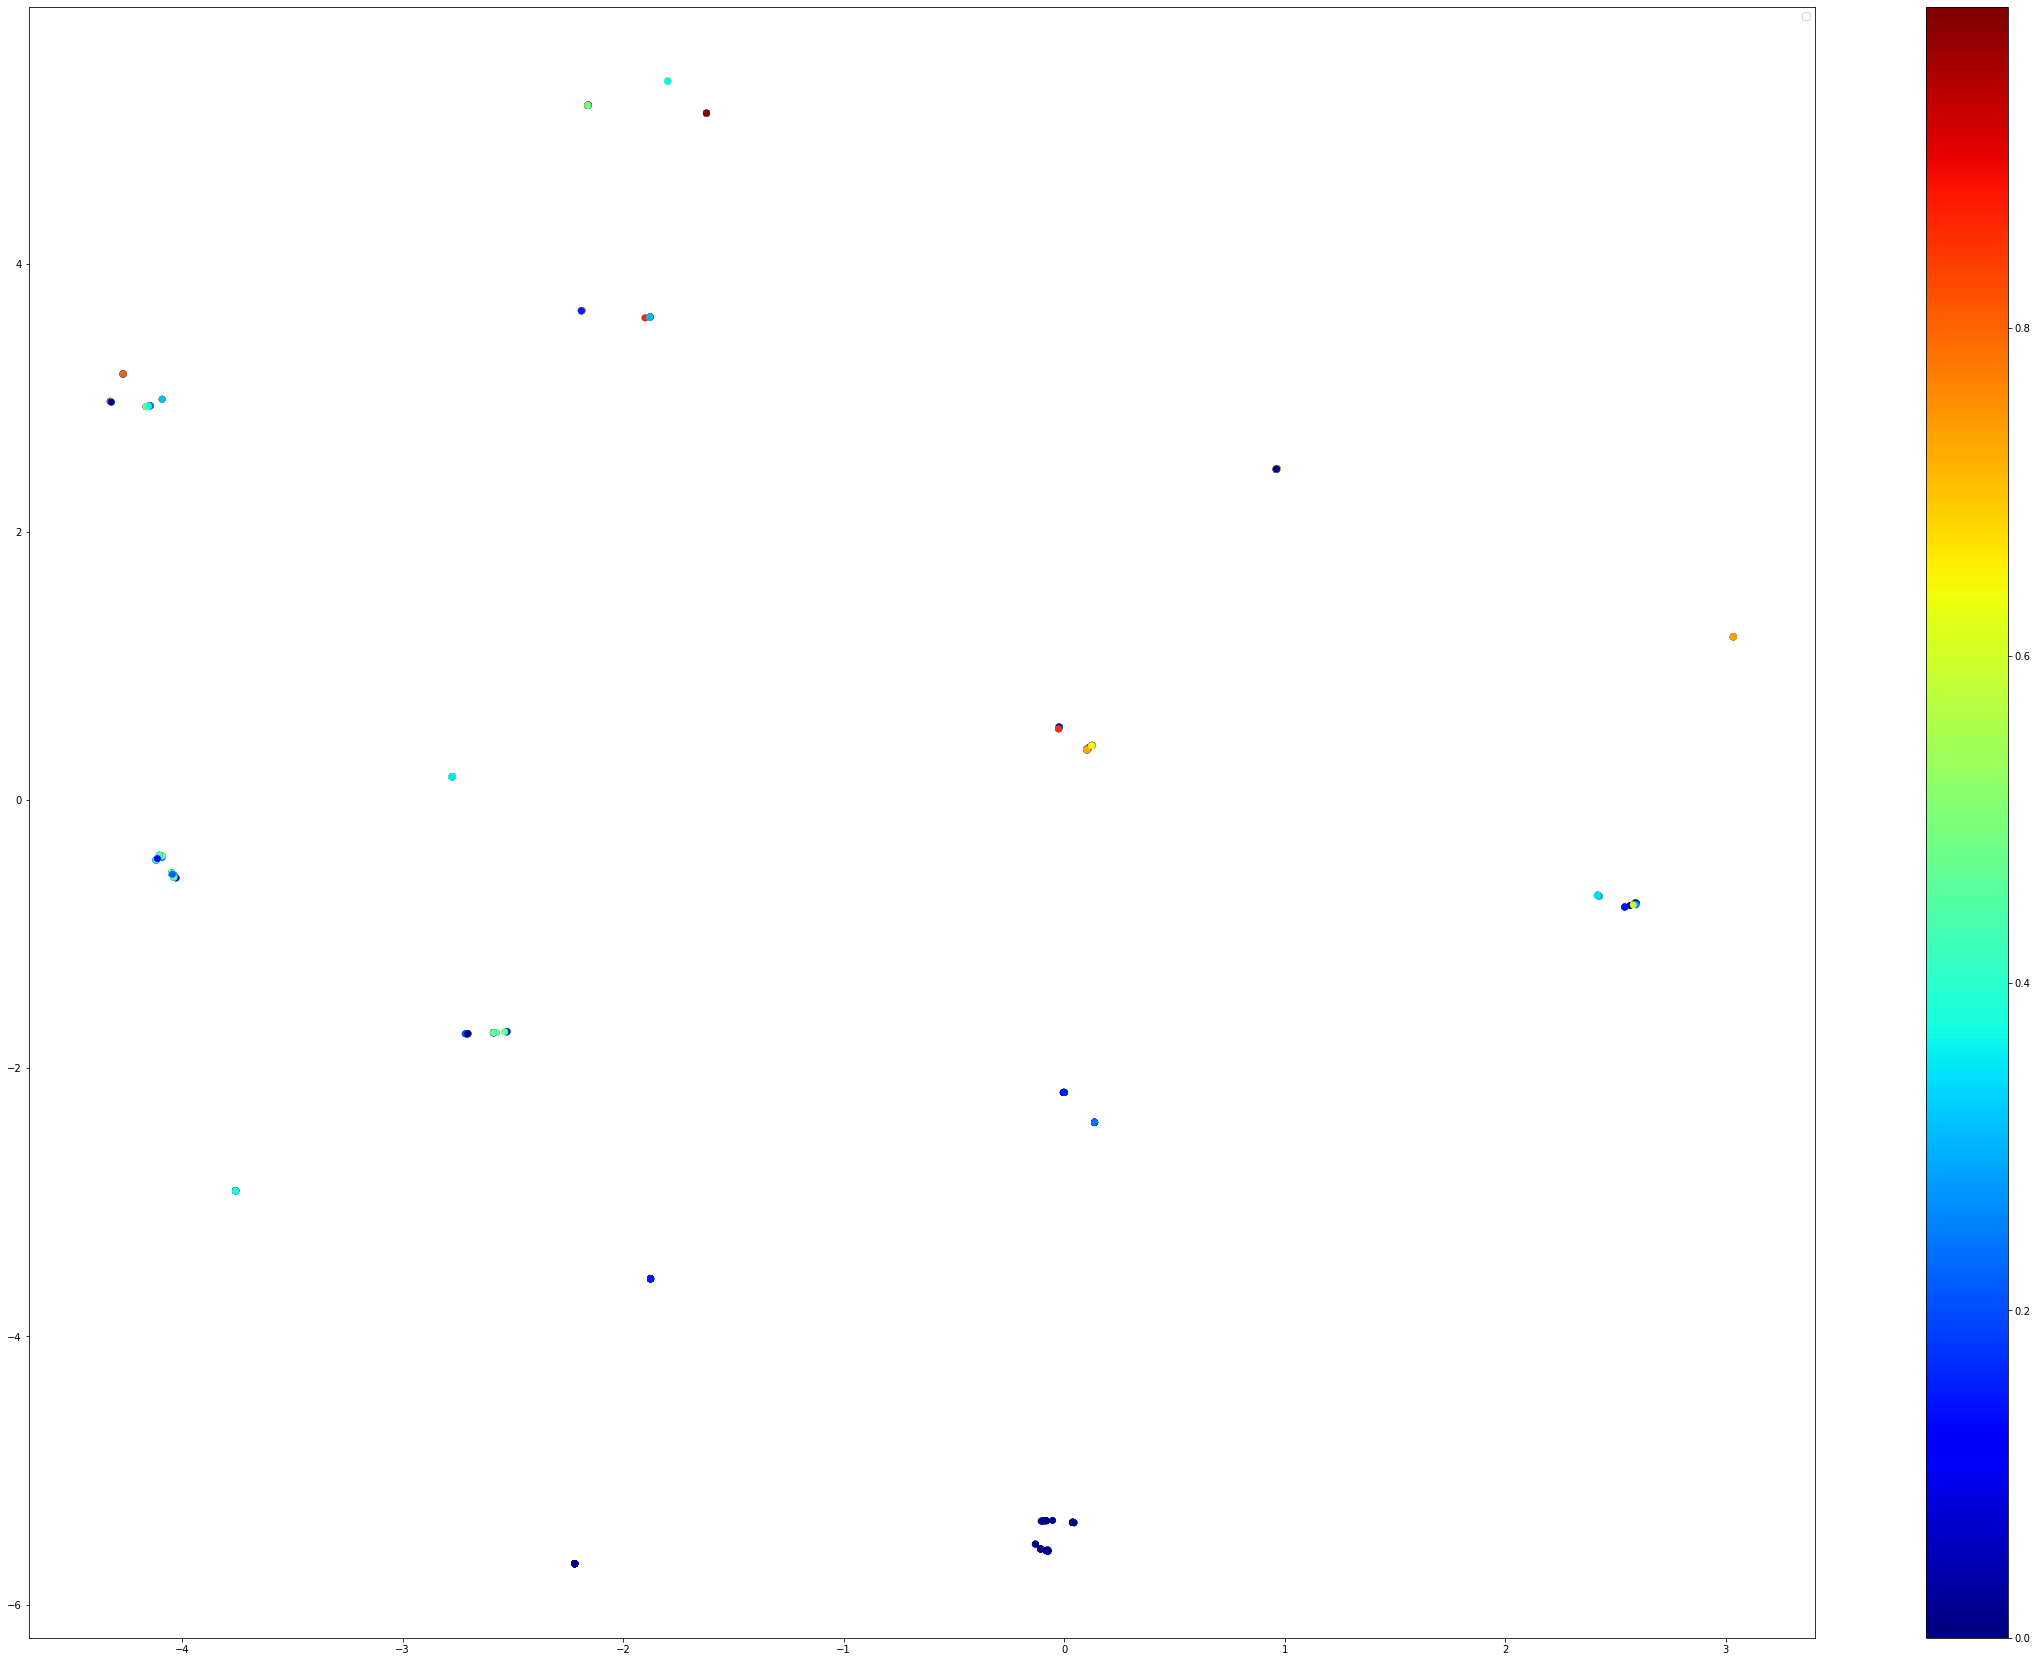

In [65]:
figure = plt.figure(figsize=(40,30))
plt.scatter(X_embedded2D.T[0], X_embedded2D.T[1], c=data_train_preds['label'], cmap = 'jet')
plt.legend()
plt.colorbar()
plt.show()

In [89]:
X3D = representations_copy[entries_names].to_numpy()
X_embedded3D = TSNE(n_components=3, perplexity=1000).fit_transform(X3D)
X_embedded3D.shape

(1186, 3)

In [90]:
def present_in_2D(data_train_preds, X_embedded2D):
    figure = plt.figure(figsize=(40,30))
    plt.scatter(X_embedded2D.T[0], X_embedded2D.T[1], c=data_train_preds['YIELD'], cmap = 'jet')
    plt.legend()
    plt.colorbar()
        
    return plt.show()

def present_in_3D(data_train_preds, X_embedded):
    df = pd.DataFrame(columns= ['x', 'y', 'z', 'predicted'])
    x, y, z, preds = [], [], [], []
    for j in range(len(X_embedded)):
        x.append(X_embedded[j][0])
        y.append(X_embedded[j][1])
        z.append(X_embedded[j][2])

        preds.append(data_train_preds['YIELD'][j])

    df['x'] = x
    df['y'] = y
    df['z'] = z
    df['predicted'] = preds

    fig = px.scatter_3d(df, x='x', y='y', z='z', color='predicted')

    return fig, df

fig1, df = present_in_3D(data_train_preds, X_embedded3D)
fig1.show()

(array([ 88., 169.,  72., 166.,  76., 163.,   0., 148.,  80., 224.]),
 array([-0.98419029, -0.78642198, -0.58865367, -0.39088537, -0.19311706,
         0.00465125,  0.20241956,  0.40018786,  0.59795617,  0.79572448,
         0.99349278]),
 <a list of 10 Patch objects>)

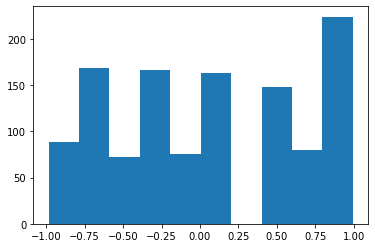

In [62]:
plt.hist(df['x'])

(array([ 96.,  84., 145.,  88.,   0., 231.,  80.,  88., 147., 227.]),
 array([-1.40176964, -1.14107887, -0.88038809, -0.61969732, -0.35900655,
        -0.09831578,  0.162375  ,  0.42306577,  0.68375654,  0.94444731,
         1.20513809]),
 <a list of 10 Patch objects>)

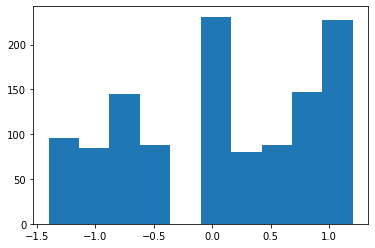

In [63]:
plt.hist(df['y'])

(array([158., 152.,  67.,   0.,  88., 225., 257.,   0.,   0., 239.]),
 array([-1.28162742, -1.05226003, -0.82289264, -0.59352525, -0.36415787,
        -0.13479048,  0.09457691,  0.32394429,  0.55331168,  0.78267907,
         1.01204646]),
 <a list of 10 Patch objects>)

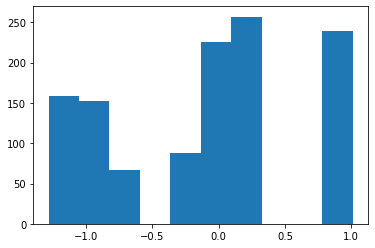

In [64]:
plt.hist(df['z'])